In [2]:
import numpy as np
from scipy import linalg
import math
import matplotlib.pyplot as plt

### Teil a

In [3]:
def transpose(A):
    result = np.zeros((A.shape[1],A.shape[0]))
    # iterate through rows
    for i in range(len(A)):
        # iterate through columns
        for j in range(len(A[0])):
            result[j][i] = A[i][j]
    return result

In [4]:
def inverse(A):
    m,n=A.shape
    I=np.eye(m) #Einheitsmatrix

    # die erweiterte Matrix durch Verkettung von A und I bilden 
    M = np.concatenate((A, I), axis=1)

    for i in range(0,n):
        # Indizierung der Zeilen
        for i in range(0, m):
            # Pivot-Wert auswählen
            pivot = M[i][i]
            
            # Zeile auswählen
            row = M[i]
            
            # 1 entlang der Diagonale erhalten
            M[i] = row / pivot
            
            # Iteration über alle Zeilen außer dem Drehpunkt, um die erweiterte Matrix in die reduzierte Zeilen-Echelon-Form zu bringen
            for j in [k for k in range(0, n) if k != i]:
                
                # aktuelle Zeile von den übrigen Zeilen subtrahieren
                M[j] = M[j] - M[i] * M[j][i]
    
    return M[:, m:]

In [5]:
def LR_Zerlegung(L, R, b):
    m,n=L.shape
    b=transpose(b)
    
    y=np.zeros((n,1), dtype = int)
    x=np.zeros((n,1), dtype = int)
    
    
    y=inverse(L)@b #Vorwärtseinsetzen
    x=inverse(R)@y #Rückwärtseinsetzen
    
    return x

In [6]:
L = np.array([[1, 0, 0], [-2, 1, 0], [4, 5, 1]])
R = np.array([[2, -1, 6], [0, 3, 9], [0, 0, -2]])
b = np.array([[18, -3, 231]])

LR_Zerlegung(L,R,b)


array([[1.],
       [2.],
       [3.]])

### Teil b

In [7]:
def lr(A):
    
    m,n=A.shape
 

    L = [[0 for x in range(n)]
             for y in range(n)]
    R = [[0 for x in range(n)]
             for y in range(n)]
    
    # lR-Zerlegung
    for i in range(n):
 
        # R(obere Dreiecksmatrix)
        for k in range(i, n):
 
            # Summe von L(i, j) * R(j, k)
            sum = 0
            for j in range(i):
                sum += (L[i][j] * R[j][k])
 
            # Algorithmus R(i, k)
            R[i][k] = A[i][k] - sum
 
        # L(untere Dreiecksmatrix)
        for k in range(i, n):
            if (i == k):
                L[i][i] = 1  # 1 in der Diagonal
            else:
                # Summe von L(k, j) * U(j, i)
                sum = 0
                for j in range(i):
                    sum += (L[k][j] * R[j][i])
                    
 
                # Algorithmus L(k, i)
                L[k][i] = int((A[k][i] - sum) / R[i][i])
 
    # Ergebnisse eingeben :
    print("Untere Dreiecksmatrix\t\tObere Dreiecksmatrix")
 
    for i in range(n):
 
        # L-Matrix
        for j in range(n):
            print(L[i][j], end="\t")
        print("", end="\t")
 
        # R-Matrix
        for j in range(n):
            print(R[i][j], end="\t")
        print("")

In [8]:
L = np.array([[1, 0, 0], [-2, 1, 0], [4, 5, 1]])
R = np.array([[2, -1, 6], [0, 3, 9], [0, 0, -2]])
X=np.matmul(L,R)
lr(X)

Untere Dreiecksmatrix		Obere Dreiecksmatrix
1	0	0		2	-1	6	
-2	1	0		0	3	9	
4	5	1		0	0	-2	


### Teil C

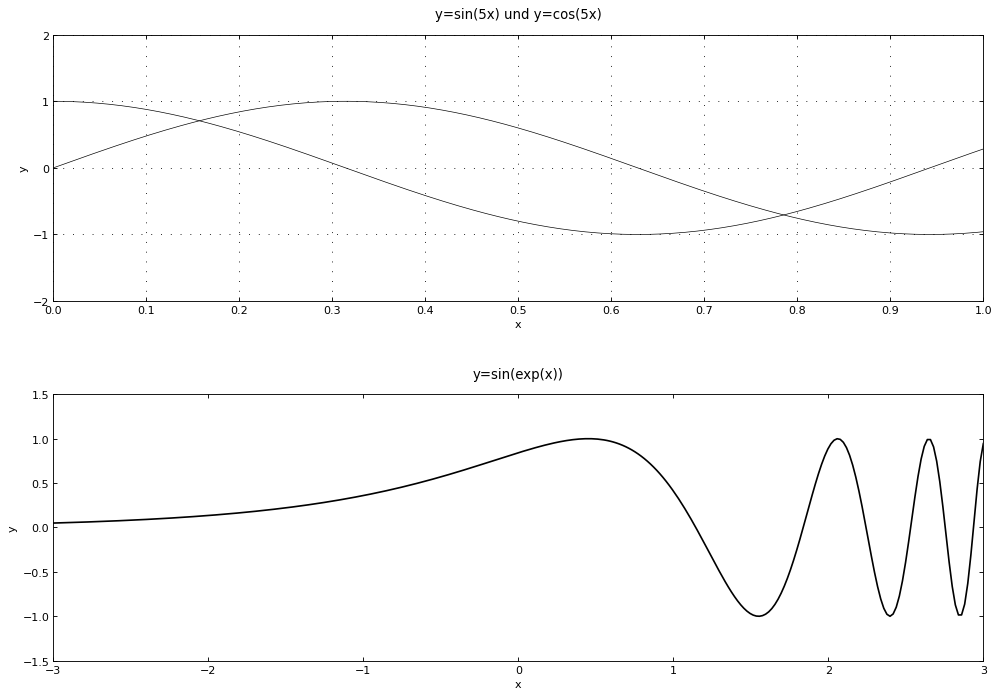

In [12]:
f1=plt.figure(figsize=(15, 16), dpi=80)

# 1. Subplot: sin(5x)/cos(5x)
ax1 = plt.subplot(311)

x_werte=np.linspace(0,1,300)
y_werte_sinus=[]
y_werte_cosinus=[]
for i in range(len(x_werte)):
    y_werte_sinus.append(math.sin(5*x_werte[i]))
    y_werte_cosinus.append(math.cos(5*x_werte[i]))
    
plt.plot(x_werte, y_werte_sinus, color = 'black', linewidth=0.6) 
plt.plot(x_werte, y_werte_cosinus, color = 'black', linewidth=0.6) 

#Eingabe der Skala
x_ticks1=np.linspace(0,1,11)
y_ticks1=np.linspace(-2,2,5)


plt.title("y=sin(5x) und y=cos(5x)", pad ='15')
plt.xticks(ticks=x_ticks1)
plt.yticks(ticks=y_ticks1)
plt.tick_params(axis="both", right=True, top=True, direction="in")
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.grid(color='k', linestyle=(0, (1, 10))) #Loosely dotted
plt.xlabel("x") 
plt.ylabel("y") 

# 2. Subplot: sin(exp(x))

ax2 = plt.subplot(312)
y_werte_exponential=[]
x_werte_exponential=np.linspace(-3,3,300)
y_werte_exponential=np.sin(np.exp(x_werte_exponential))
plt.plot(x_werte_exponential, y_werte_exponential, color = 'black', linewidth=0.6) 


#Eingabe der Skala
x_ticks2=np.linspace(-3,3,7)
y_ticks2=np.linspace(-1.5,1.5,7)

plt.title("y=sin(exp(x))", pad='15')
plt.xticks(ticks=x_ticks2)
plt.yticks(ticks=y_ticks2)
plt.tick_params(axis="both", right=True, top=True, direction="in")
plt.xlim(-3, 3)
plt.ylim(-1.5, 1.5)
# plt.grid(color='k', linestyle=(0, (1, 10))) #Loosely dotted
plt.xlabel("x") 
plt.ylabel("y") 

#Plots Einstellungen
plt.subplots_adjust(hspace=0.35)
plt.show() 